# ANALIZA SKUPA PODATAKA ZA PREDVIĐANJE DIJABETESA

In [77]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [78]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Ovaj skup podataka sadrži dvije kategoričke i jednu ciljnu varijablu, dok su ostale numeričke.

In [80]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [81]:
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [82]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Skup podataka ne sadrži nedostajuće vrijednosti.

In [83]:
data = data[(data["gender"] == 'Male') | (data["gender"] == 'Female')]

#
## DISTRIBUCIJA ZNAČAJKI PO KLASAMA

In [84]:
diabetic_patients = data[data['diabetes'] == 1]

In [85]:
diabetic_patients['diabetes'].count()

np.int64(8500)

In [86]:
non_diabetic_patients = data[data['diabetes'] == 0]
non_diabetic_patients['diabetes'].count()

np.int64(91482)

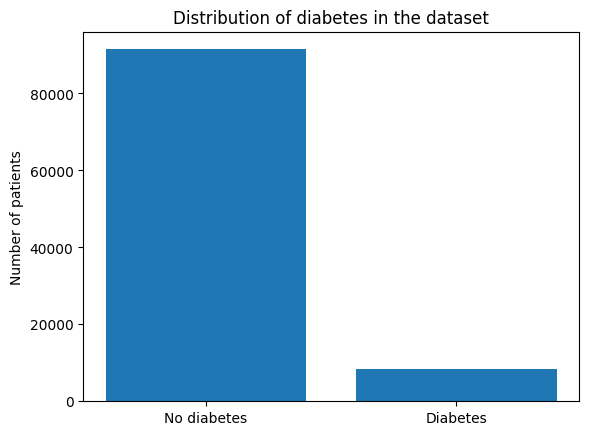

In [87]:
labels = ["No diabetes", "Diabetes"]
values = [
    (data["diabetes"] == 0).sum(),
    (data["diabetes"] == 1).sum()
]

plt.figure()
plt.bar(labels, values)
plt.ylabel("Number of patients")
plt.title("Distribution of diabetes in the dataset")
plt.show()


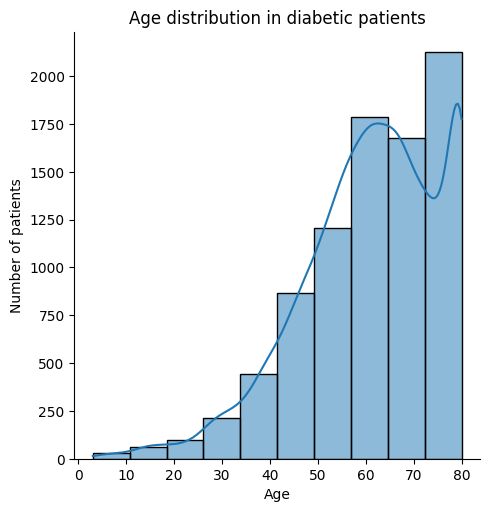

In [88]:
ax = sns.displot(diabetic_patients['age'], kde=True, bins=10)
ax.set(
    xlabel='Age',
    ylabel='Number of patients',
    title='Age distribution in diabetic patients'
)

plt.show()

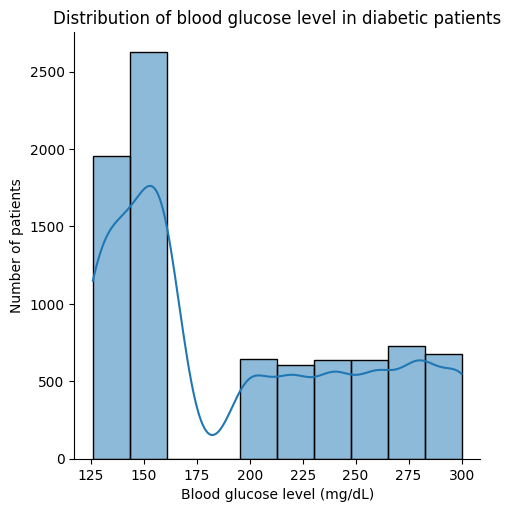

In [89]:
ax = sns.displot(diabetic_patients['blood_glucose_level'], kde=True, bins=10)
ax.set(
    xlabel='Blood glucose level (mg/dL)',
    ylabel='Number of patients',
    title='Distribution of blood glucose level in diabetic patients'
)

plt.show()

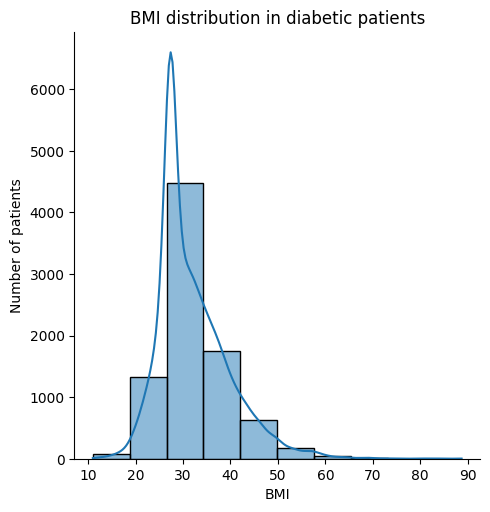

In [90]:
ax = sns.displot(diabetic_patients['bmi'], kde=True, bins=10)
ax.set(
    xlabel='BMI',
    ylabel='Number of patients',
    title='BMI distribution in diabetic patients'
)

plt.show()

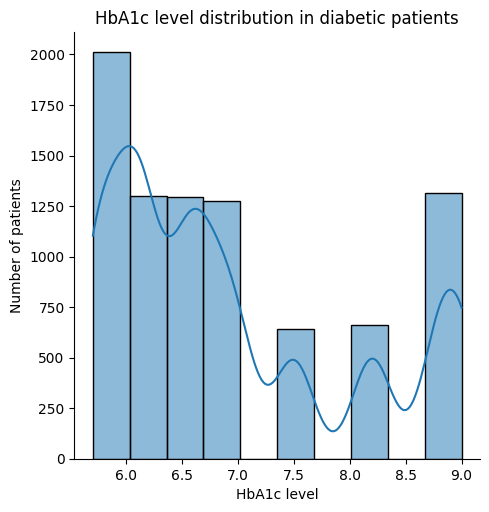

In [91]:
ax = sns.displot(diabetic_patients['HbA1c_level'], kde=True, bins=10)
ax.set(
    xlabel='HbA1c level',
    ylabel='Number of patients',
    title='HbA1c level distribution in diabetic patients'
)

plt.show()

In [92]:
yes_no_map = {0: "No", 1: "Yes"}

binary_features = ['hypertension', 'heart_disease']

diabetic_patients_plot = diabetic_patients.copy()

for col in binary_features:
    diabetic_patients_plot[f'{col}_label'] = (
        diabetic_patients_plot[col].map(yes_no_map)
    )

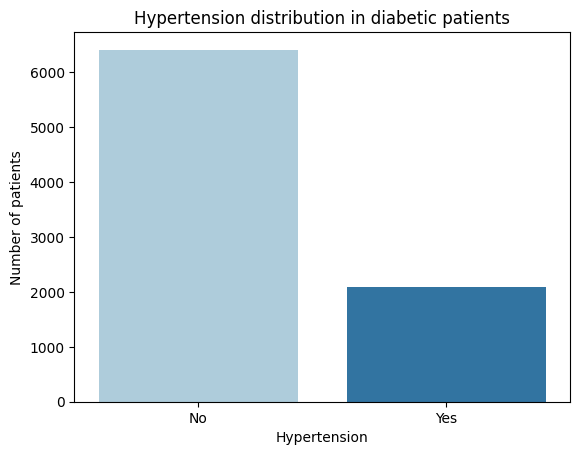

In [93]:
sns.countplot(data=diabetic_patients_plot, x='hypertension_label', hue='hypertension_label', palette='Paired')

plt.xlabel('Hypertension')
plt.ylabel('Number of patients')
plt.title('Hypertension distribution in diabetic patients')
plt.show()

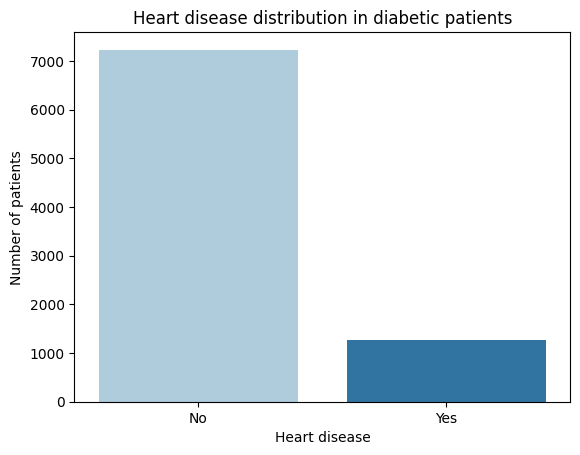

In [94]:
sns.countplot(data=diabetic_patients_plot, x='heart_disease_label', hue='heart_disease_label', palette='Paired')

plt.xlabel('Heart disease')
plt.ylabel('Number of patients')
plt.title('Heart disease distribution in diabetic patients')
plt.show()

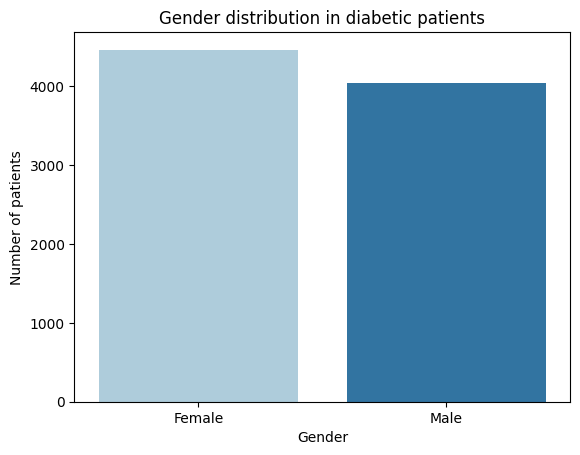

In [95]:
sns.countplot(data=diabetic_patients, x='gender', hue='gender', palette='Paired', legend=False)

plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Gender distribution in diabetic patients')
plt.show()

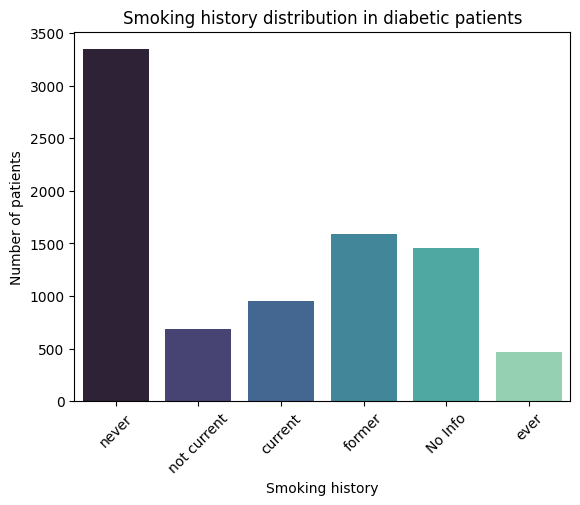

In [96]:
sns.countplot(data=diabetic_patients, x='smoking_history', hue='smoking_history', palette='mako', legend=False)

plt.xlabel('Smoking history')
plt.ylabel('Number of patients')
plt.title('Smoking history distribution in diabetic patients')
plt.xticks(rotation=45)
plt.show()

#

## ONE-HOT ENCODING I MIN-MAX SKALIRANJE

In [97]:
patients = data.copy()

categorical_cols = ["smoking_history"]
for i in range(len(categorical_cols)):
  ohe = OneHotEncoder()
  transformed = ohe.fit_transform(patients[[categorical_cols[i]]])
  patients[ohe.categories_[0]]=transformed.toarray()
patients.drop(columns=categorical_cols, inplace=True)
patients['gender'] = patients['gender'].replace({'Male': 1, 'Female': 0})
patients['age'] = patients['age'].astype(int)

/tmp/ipython-input-1804215684.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  patients['gender'] = patients['gender'].replace({'Male': 1, 'Female': 0})


In [98]:
patients.head(5)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,0,80,0,1,25.19,6.6,140,0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,54,0,0,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,28,0,0,27.32,5.7,158,0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,36,0,0,23.45,5.0,155,0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,76,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,0.0,0.0


In [99]:
sc=MinMaxScaler()
numeric_cols = ['age','bmi','HbA1c_level', 'blood_glucose_level']
patients[numeric_cols]=sc.fit_transform(patients[numeric_cols])

#
## OVERSAMPLING

In [100]:
oversample = RandomOverSampler(sampling_strategy=0.3)
X=patients.drop(columns=['diabetes']).copy()
y=patients['diabetes'].copy()
X_oversampled, y_oversampled = oversample.fit_resample(X, y)

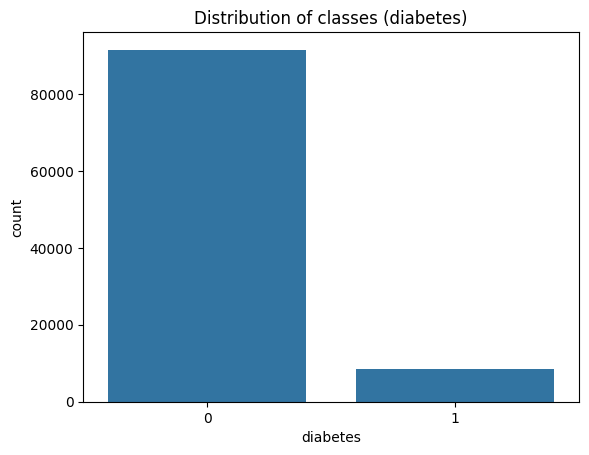

In [101]:
sns.countplot(x=y)
plt.title("Distribution of classes (diabetes)")
plt.show()

In [102]:
patientsForTraining = X_oversampled.copy()
patientsForTraining.insert(13, "Diabetes", y_oversampled, True)
patientsForTraining.to_csv("dataset-diabetes-cleaned-oversampled.csv", index=False)

Ponovno uzorkovanje manjinske klase primijenjeno je kako bi se spriječilo pristranost modela prema većinskoj klasi.

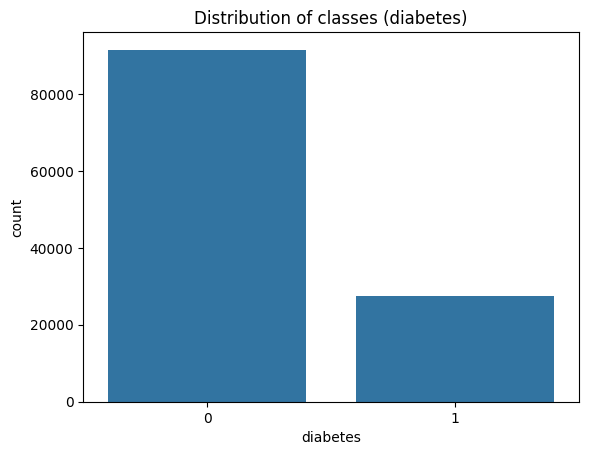

In [103]:
sns.countplot(x=y_oversampled)
plt.title("Distribution of classes (diabetes)")
plt.show()